In [2]:
"""
### Code adapted from:
Mind Monitor - Minimal EEG OSC Receiver
Coded: James Clutterbuck (2021)
Requires: pip install python-osc
"""
from datetime import datetime
from pythonosc import dispatcher
from pythonosc import osc_server

ip = "192.168.1.165"
port = 5000

EEG_log_list = []

def eeg_handler(address: str,*args):
    dateTimeObj = datetime.now()
    printStr = dateTimeObj.strftime("%Y-%m-%d %H:%M:%S.%f")
    for arg in args:
        printStr += ","+str(arg)
    print(printStr)
    EEG_log_list.append(printStr)
    print('EEG LOG LIST NOW HAS LENGTH', len(EEG_log_list))
    
if __name__ == "__main__":
    dispatcher = dispatcher.Dispatcher()
    dispatcher.map("/muse/eeg", eeg_handler)

    server = osc_server.ThreadingOSCUDPServer((ip, port), dispatcher)
    print("Listening on UDP port "+str(port))
    server.serve_forever()

Listening on UDP port 5000
2021-06-01 11:43:16.477670,805.054931640625,796.5933837890625,811.098876953125,830.4395751953125,901.75823974609382021-06-01 11:43:16.480670,794.981689453125,785.3113403320312,798.6080322265625,802.6373901367188,696.26373291015622021-06-01 11:43:16.483672,797.3992919921875,797.3992919921875,802.6373901367188,794.5787353515625,890.47619628906252021-06-01 11:43:16.486671,803.8461303710938,793.3699340820312,787.7289428710938,788.1318969726562,840.51281738281252021-06-01 11:43:16.489842,803.8461303710938,810.2930297851562,813.113525390625,818.3516235351562,869.52380371093752021-06-01 11:43:16.492245,829.6337280273438,813.5164794921875,807.4725341796875,830.03662109375,862.6740112304688
2021-06-01 11:43:16.495244,832.8571166992188,828.8278198242188,816.7399291992188,828.02197265625,863.0769042968752021-06-01 11:43:16.498248,831.6483764648438,821.97802734375,796.1904907226562,801.8314819335938,915.4578857421875
EEG LOG LIST NOW HAS LENGTH 1

2021-06-01 11:43:16.501

KeyboardInterrupt: 

In [3]:
print(EEG_log_list[:10])

['2021-06-01 11:43:16.498248,831.6483764648438,821.97802734375,796.1904907226562,801.8314819335938,915.4578857421875', '2021-06-01 11:43:16.504249,803.040283203125,793.7728881835938,796.5933837890625,804.2490844726562,871.5384521484375', '2021-06-01 11:43:16.489842,803.8461303710938,810.2930297851562,813.113525390625,818.3516235351562,869.5238037109375', '2021-06-01 11:43:16.508789,817.94873046875,816.3369750976562,816.3369750976562,820.7692260742188,724.06591796875', '2021-06-01 11:43:16.513788,832.8571166992188,807.87548828125,802.6373901367188,804.2490844726562,843.7362670898438', '2021-06-01 11:43:16.477670,805.054931640625,796.5933837890625,811.098876953125,830.4395751953125,901.7582397460938', '2021-06-01 11:43:16.527408,807.069580078125,811.5018310546875,813.113525390625,815.5311279296875,881.6116943359375', '2021-06-01 11:43:16.517789,803.4432373046875,795.3846435546875,803.040283203125,815.93408203125,803.4432373046875', '2021-06-01 11:43:16.519789,791.3552856445312,805.860778

In [4]:
import pandas as pd
import numpy as np
from time import time

import matplotlib
#matplotlib.rcParams.keys()
matplotlib.rcParams['font.size'] = 11

time0 = time()
def transform_OSC_log_to_array(EEG_log):
    timepoint_dict = dict()
    timestamp_list=[]
    dataFiveElectrodes_list=[]
    for log_item in EEG_log:
        split_item = log_item.split(',')
        timestamp_list.append(split_item[0])
        dataFiveElectrodes_list.append(np.array(split_item[1:]))
    dataFiveElectrodes_array = np.vstack(np.array(dataFiveElectrodes_list))
    df = pd.DataFrame(dataFiveElectrodes_array, index=pd.to_datetime(timestamp_list, format="%Y-%m-%d %H:%M:%S.%f"), 
                      columns=['TP9','AF7','AF8','TP10','AUX-R'], dtype='float')
    return(df)

df1 = transform_OSC_log_to_array(EEG_log_list)
print(df1.info())
print('TIME ELAPSED:', time()-time0)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23124 entries, 2021-06-01 11:43:16.498248 to 2021-06-01 11:44:46.768108
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TP9     23124 non-null  float64
 1   AF7     23124 non-null  float64
 2   AF8     23124 non-null  float64
 3   TP10    23124 non-null  float64
 4   AUX-R   23124 non-null  float64
dtypes: float64(5)
memory usage: 1.1 MB
None
TIME ELAPSED: 0.33202505111694336


In [5]:
df1.head()

TP9         AF7         AF8        TP10  \
2021-06-01 11:43:16.498248  831.648376  821.978027  796.190491  801.831482   
2021-06-01 11:43:16.504249  803.040283  793.772888  796.593384  804.249084   
2021-06-01 11:43:16.489842  803.846130  810.293030  813.113525  818.351624   
2021-06-01 11:43:16.508789  817.948730  816.336975  816.336975  820.769226   
2021-06-01 11:43:16.513788  832.857117  807.875488  802.637390  804.249084   

                                 AUX-R  
2021-06-01 11:43:16.498248  915.457886  
2021-06-01 11:43:16.504249  871.538452  
2021-06-01 11:43:16.489842  869.523804  
2021-06-01 11:43:16.508789  724.065918  
2021-06-01 11:43:16.513788  843.736267

In [6]:
df1_sorted = df1.sort_index(inplace=False)
print(df1_sorted.info())
df1_sorted.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23124 entries, 2021-06-01 11:43:16.477670 to 2021-06-01 11:44:46.770108
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TP9     23124 non-null  float64
 1   AF7     23124 non-null  float64
 2   AF8     23124 non-null  float64
 3   TP10    23124 non-null  float64
 4   AUX-R   23124 non-null  float64
dtypes: float64(5)
memory usage: 1.1 MB
None


TP9         AF7         AF8        TP10  \
2021-06-01 11:43:16.477670  805.054932  796.593384  811.098877  830.439575   
2021-06-01 11:43:16.480670  794.981689  785.311340  798.608032  802.637390   
2021-06-01 11:43:16.483672  797.399292  797.399292  802.637390  794.578735   
2021-06-01 11:43:16.486671  803.846130  793.369934  787.728943  788.131897   
2021-06-01 11:43:16.489842  803.846130  810.293030  813.113525  818.351624   

                                 AUX-R  
2021-06-01 11:43:16.477670  901.758240  
2021-06-01 11:43:16.480670  696.263733  
2021-06-01 11:43:16.483672  890.476196  
2021-06-01 11:43:16.486671  840.512817  
2021-06-01 11:43:16.489842  869.523804

In [7]:
duration = df1_sorted.index[-1] - df1_sorted.index[0]
data_points_over_time = len(df1_sorted)-1
print('duration:',duration)
print(data_points_over_time, 'time points')
print('average sampling rate (fs)',data_points_over_time/(duration.seconds + duration.microseconds/1e6))

duration: 0 days 00:01:30.292438
23123 time points
average sampling rate (fs) 256.09010579601363


In [8]:
print(60*df1_sorted.index[:5].minute.values + df1_sorted.index[:5].second.values + df1_sorted.index[:5].microsecond.values/1e6)

[2596.47767  2596.48067  2596.483672 2596.486671 2596.489842]


In [9]:
extracted_seconds = 60*df1_sorted.index.minute.values + (df1_sorted.index.second.values + df1_sorted.index.microsecond.values/1e6)
print(np.diff(extracted_seconds)[:10])

[0.003    0.003002 0.002999 0.003171 0.002403 0.002999 0.003004 0.002999
 0.003002 0.001995]


In [10]:
import matplotlib.pyplot as plt

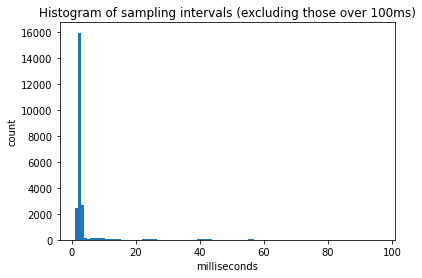

11 values excluding for being over 100ms


In [11]:
plt.hist(np.diff(extracted_seconds)[np.diff(extracted_seconds)<0.1]*1000, bins=100)
plt.xlabel('milliseconds')
plt.ylabel('count')
plt.title('Histogram of sampling intervals (excluding those over 100ms)')
plt.show()
print('{} values excluding for being over 100ms'.format(int(len(np.diff(extracted_seconds)) - len(np.diff(extracted_seconds)[np.diff(extracted_seconds)<0.1])  )))

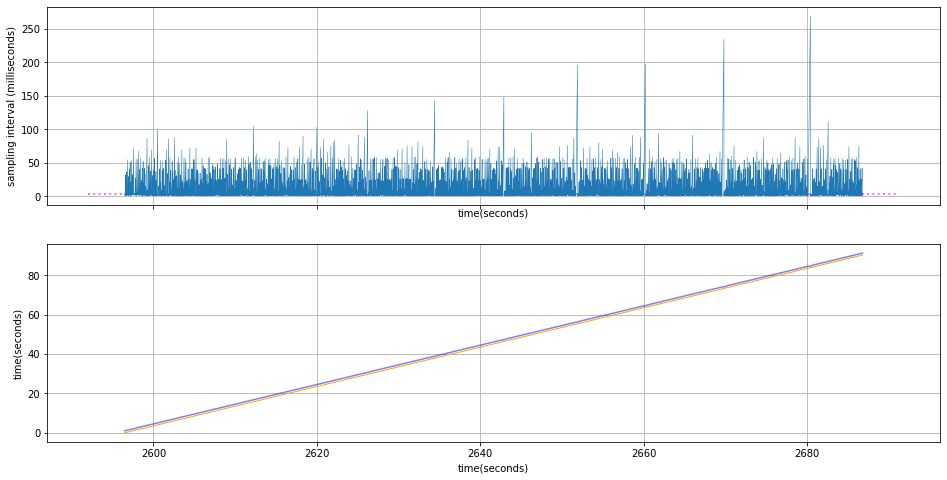

s = 1
e = 23123
blue segment sampling rate = 256.0875392756342
total duration modeled = 90.28943800000025


In [12]:
fig, (ax, ax2) = plt.subplots(2,1,figsize=(16,8), sharex=True)
#plt.yscale('log')
ax.plot(extracted_seconds[1:], np.diff(extracted_seconds)*1000, lw=0.5)


#ax.set_xlim(9,10)
#ax.set_ylim(0,50)
ax.hlines(1000/256, *ax.get_xlim(), lw=2, alpha=0.5, ls='dotted', color='m')
ax.grid()
ax.set_xlabel('time(seconds)')
ax.set_ylabel('sampling interval (milliseconds)')

ax2.plot(extracted_seconds[1:], np.cumsum(np.diff(extracted_seconds)), lw=1, color='orange')
#ax2.scatter(extracted_seconds[1:], np.cumsum(np.diff(extracted_seconds)), s=4, alpha=0.5)
s=1
e=len(extracted_seconds)-1   #int(len(extracted_seconds[:-1])/2)
offset_y = 1
#ax2.scatter(extracted_seconds[s:e], offset_y+np.cumsum(np.diff(extracted_seconds[s-1:e])), s=4, alpha=0.2, color='green')
ax2.plot(extracted_seconds[s:e], offset_y+range(len(extracted_seconds[s:e]))/(len(extracted_seconds[s:e])/(extracted_seconds[e]-extracted_seconds[s])), color='b', alpha=0.5)

ax2.set_xlabel('time(seconds)')
ax2.set_ylabel('time(seconds)')
#ax2.set_ylim(1,2.5)
ax2.grid()
plt.show()

print('s =',s)
print('e =',e)
print('blue segment sampling rate =', (len(extracted_seconds[s:e])/(extracted_seconds[e]-extracted_seconds[s])))
print('total duration modeled =', extracted_seconds[e]-extracted_seconds[s])

In [13]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

import seaborn as sns

from sklearn.decomposition import FastICA
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples

from scipy.cluster.hierarchy import dendrogram

# helper functions

# Complex morlet wavelets (cmw) consist of a sine wave multiplied by a Gaussian. 
# (The imaginary term comes from Euler's formula.)
cmw = lambda t, f, s: (1/np.sqrt(s*np.sqrt(np.pi))) * np.exp(-t**2/(2*s**2)) * np.exp(1j*2*np.pi*f*t)
# Where t is time axis, f is peak frequency of wavelet, and s is standard deviation of Gaussian (std_for_gaussian)
std_for_gaussian = lambda n, f: n/(2*np.pi*f)
# Where f is peak frequency of wavelet and n is number of wavelet cycles

# Although not used in this notebook, this visualize_wavelet function can be helpful for understanding.
def visualize_wavelet(freq=6, n_wavelet_cycles=6, windowLengthSeconds=1, fs=300):
    x = np.linspace(-windowLengthSeconds/2, windowLengthSeconds/2, int(windowLengthSeconds*fs)+1)  # 300 Hz sampling rate
    complex_morlet_wavelet = cmw(x, freq, std_for_gaussian(n=n_wavelet_cycles, f=freq))

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(x, np.real(complex_morlet_wavelet), np.imag(complex_morlet_wavelet))
    ax.set_xlabel('time(s)')
    ax.set_ylabel('real')
    ax.set_zlabel('imag')
    plt.show()

    fig = plt.figure()  # real component is centered at time=0 (like a cosine function)
    ax = fig.gca(projection='3d')
    ax.plot(x, np.real(complex_morlet_wavelet), np.imag(complex_morlet_wavelet))
    ax.view_init(90, -90)
    ax.set_xlabel('time(s)')
    ax.set_ylabel('real')
    ax.set_zlabel('imag')
    plt.show()

    fig = plt.figure()   # imaginary component is phase-shifted by 90 degrees (like a sine function)
    ax = fig.gca(projection='3d')
    ax.plot(x, np.real(complex_morlet_wavelet), np.imag(complex_morlet_wavelet))
    ax.view_init(0, -90)
    ax.set_xlabel('time(s)')
    ax.set_ylabel('real')
    ax.set_zlabel('imag')
    plt.show()

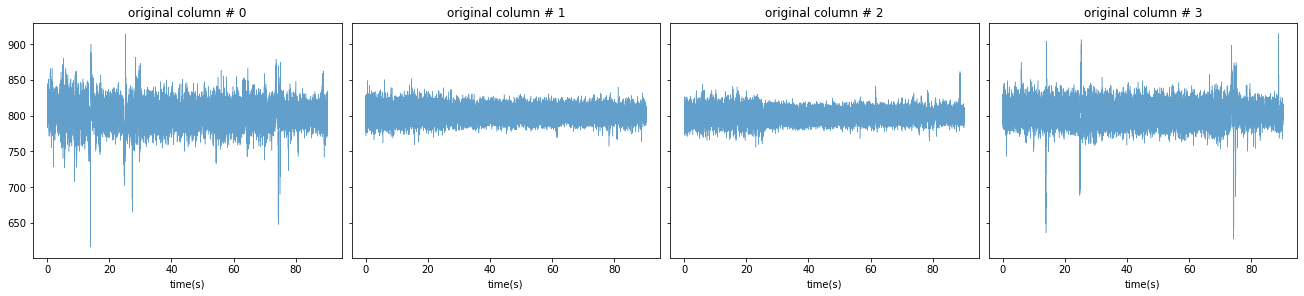

In [14]:
s_ = s-1
e_ = e
fs = (len(extracted_seconds[s:e])/(extracted_seconds[e]-extracted_seconds[s]))
num_columns = 4
duration_of_input = extracted_seconds[e]-extracted_seconds[s]

# Load data
plot_things=True  # Make this False to accelerate runtime

#data_single_path = 'data1_single\\data1_single.csv'
#data_full_path = 'data2_full\\data2_full.csv'

time0 = time()
# Load data and give times assuming 300Hz sampling rate
df_full = df1_sorted.iloc[s:e, :num_columns]
time_axis = np.linspace(0, len(df_full)/fs, len(df_full), endpoint=False) 
df_full.index = time_axis

if plot_things==True:
    fig, axes = plt.subplots(1,num_columns, figsize=(18,4), constrained_layout=True, sharey=True, sharex=True)
    for i, ax in enumerate(axes.flatten()):
        if i < num_columns:
            ax.plot(df_full.index, df_full.iloc[:,i], lw=0.5, alpha=0.7)
            ax.set_xlabel('time(s)')
            #ax.set_ylim(-150,150)
            ax.set_title('original column # '+str(i))
    plt.show()

Blind source separation complete
Finding outliers with multidimensional EllipticEnvelope.
Rejecting dimensions where outliers have high variance. [var(outliers) > 4*var(inliers)]
['source 0 has outlier/inlier variance ratio of 4.14', 'source 1 has outlier/inlier variance ratio of 16.77', 'source 2 has outlier/inlier variance ratio of 6.98', 'source 3 has outlier/inlier variance ratio of 1.73']
3 sources rejected : [0, 1, 2]


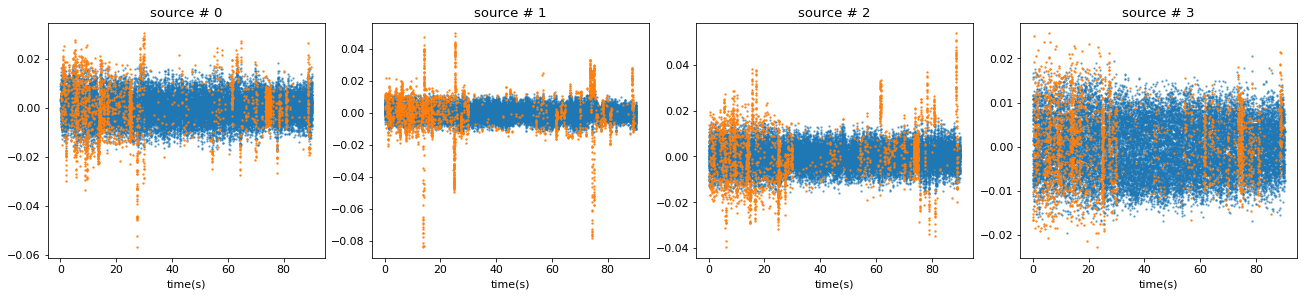

In [40]:
# Blind source separation 
# Failure to converge can be fixed by increasing max_iter and tol arguments, but results will be the same.
ica = FastICA(n_components=len(df_full.columns)) # , max_iter=500, tol=6e-3  # , random_state=0
ica_sources = ica.fit_transform(df_full.values)
print("Blind source separation complete")

# Identify outliers and reject problematic noise sources
print('Finding outliers with multidimensional EllipticEnvelope.')
outlier_labels = EllipticEnvelope().fit_predict(ica_sources)  # find outliers
inlier_mask = outlier_labels==1

# Reject sources where the set of all outliers have at least 4 times more variance than the set of all inliers
print('Rejecting dimensions where outliers have high variance. [var(outliers) > 4*var(inliers)]')
print(['source '+str(i)+' has outlier/inlier variance ratio of '+str(np.round(np.var(ica_sources[:,i][~inlier_mask]) / np.var(ica_sources[:,i][inlier_mask]), 2)) for i in range(num_columns)])
reject_source_list = [i for i in range(num_columns) if np.var(ica_sources[:,i][~inlier_mask]) / np.var(ica_sources[:,i][inlier_mask]) > 4]
print('{} sources rejected :'.format(len(reject_source_list)), reject_source_list)

if plot_things==True:
    fig, axes = plt.subplots(1,num_columns, figsize=(18,4), constrained_layout=True)
    for i, ax in enumerate(axes.flatten()):
        if i < num_columns:
            ax.scatter(df_full.index[inlier_mask], ica_sources[:,i][inlier_mask], s=2, alpha=0.5)
            ax.scatter(df_full.index[~inlier_mask], ica_sources[:,i][~inlier_mask], s=2, alpha=0.8)        
            ax.set_xlabel('time(s)')
            ax.set_title('source # '+str(i))
    plt.show()

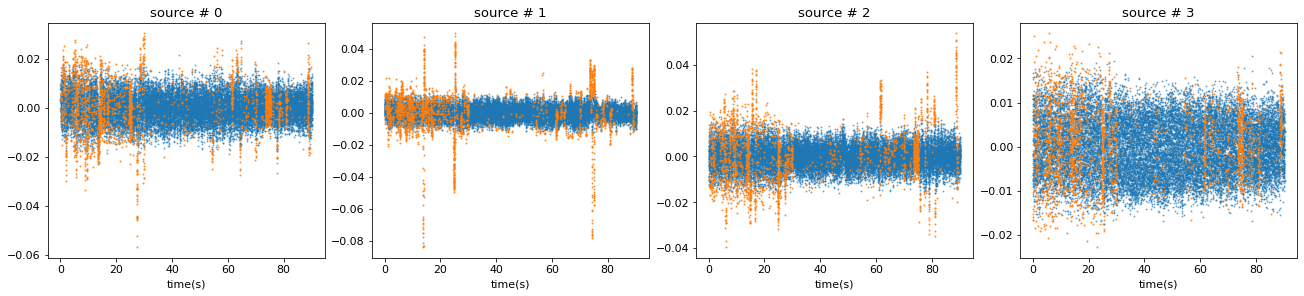

In [41]:

if plot_things==True:
    fig, axes = plt.subplots(1,num_columns, figsize=(18,4), constrained_layout=True)
    for i, ax in enumerate(axes.flatten()):
        if i < num_columns:
            ax.scatter(df_full.index[inlier_mask], ica_sources[:,i][inlier_mask], s=1, alpha=0.5)
            ax.scatter(df_full.index[~inlier_mask], ica_sources[:,i][~inlier_mask], s=1, alpha=0.8)        
            ax.set_xlabel('time(s)')
            ax.set_title('source # '+str(i))
    plt.show()

Remixing without rejected sources


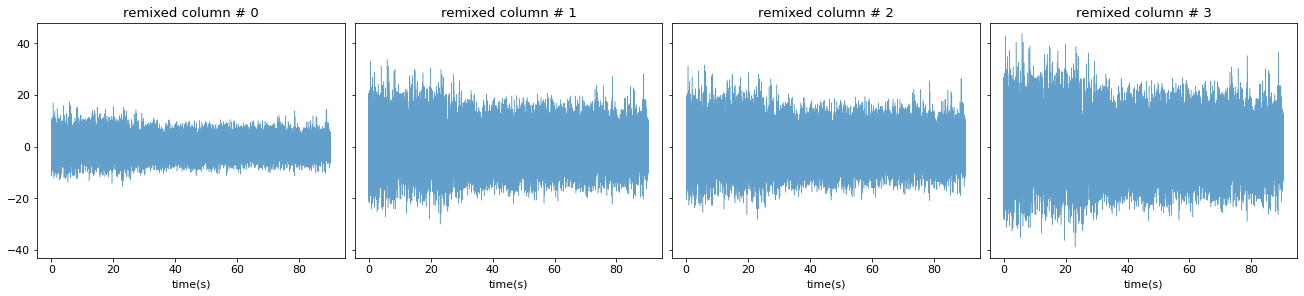

In [42]:
print('Remixing without rejected sources')

# Remix channels without problematic sources
keep_components = [i for i in range(num_columns) if i not in reject_source_list]
remixed_full = np.dot(ica.mixing_[:,keep_components], ica_sources.T[keep_components,:]).T

if plot_things==True:
    # Test everything so far
    fig, axes = plt.subplots(1,num_columns, figsize=(18,4), constrained_layout=True, sharex=True, sharey=True)
    for i, ax in enumerate(axes.flatten()):
        if i < num_columns:
            ax.plot(df_full.index, remixed_full[:,i], lw=0.5, alpha=0.7)
            ax.set_xlabel('time(s)')
            #ax.set_ylim(-150,150)
            ax.set_title('remixed column # '+str(i))
    plt.show()

In [43]:
def apply_wavelets(freqs, data, n_wavelet_cycles, fs, extract_list=['power'], num_EEG_channels=4, plot_things=False, verbose=False):
    # Ensure n_wavelet_cycles is coherent with freqs (Either int/float or sequence with length matching len(freqs))
    if type(n_wavelet_cycles)==int or type(n_wavelet_cycles)==float:
        n_wavelet_cycles = [n_wavelet_cycles] * len(freqs)
    else:
        assert len(n_wavelet_cycles) == len(freqs), 'Error: If n_wavelet_cycles is a sequence, it must match length of freqs.'
    
    std_for_gaussian = lambda n, f: n/(2*np.pi*f)
    cmw = lambda t, f, s: (1/np.sqrt(s*np.sqrt(np.pi))) * np.exp(-t**2/(2*s**2)) * np.exp(1j*2*np.pi*f*t)
    
    outer_list = []
    
    for freq, n_cycles in zip(freqs, n_wavelet_cycles): # iterate over each peak frequency
        inner_dict = dict()
        windowLengthSeconds=1
        t = np.linspace(-windowLengthSeconds/2, windowLengthSeconds/2, int(windowLengthSeconds*fs)+1)  # 300 Hz sampling rate
        complex_morlet_wavelet = cmw(t, freq, std_for_gaussian(n=n_cycles, f=freq))
        
        if plot_things==True:
            visualize_wavelet(freq, n_wavelet_cycles=n_cycles, windowLengthSeconds=windowLengthSeconds, fs=fs)
        
        for i in range(num_EEG_channels):   # iterate over each channel
            complex_convolved = np.convolve(complex_morlet_wavelet, data[:,i], mode='same')
            
            inner_dict['bandpass_'+str(i)] = np.real(complex_convolved)  
            inner_dict['amplitude_'+str(i)] = np.abs(complex_convolved)
            inner_dict['power_'+str(i)] = np.abs(complex_convolved**2)
            inner_dict['phase_'+str(i)] = np.angle(complex_convolved)

        outer_list.append(inner_dict)

        if verbose==True: 
            print(inner_dict.keys())

    new_df=pd.DataFrame({extraction+str(np.round(freq,1))+'HzCh'+str(i) : outer_item[extraction+'_'+str(i)] for extraction in extract_list for i in range(num_EEG_channels) for freq, outer_item in zip(freqs, outer_list)})
    return new_df   

In [52]:
time0 = time()
# 78 wavelets with peak frequency of 2Hz, 3Hz,..., 79Hz with n_cycles of 2, 3, ..., 79.
wavelet_output = apply_wavelets(np.linspace(2,80,40), data=remixed_full, n_wavelet_cycles=np.linspace(2,80,40), fs=fs, extract_list=['power'], plot_things=False, verbose=False)      

print('Power extract runtime = {} seconds'.format(np.round(time()-time0, 1)))

Power extract runtime = 0.9 seconds


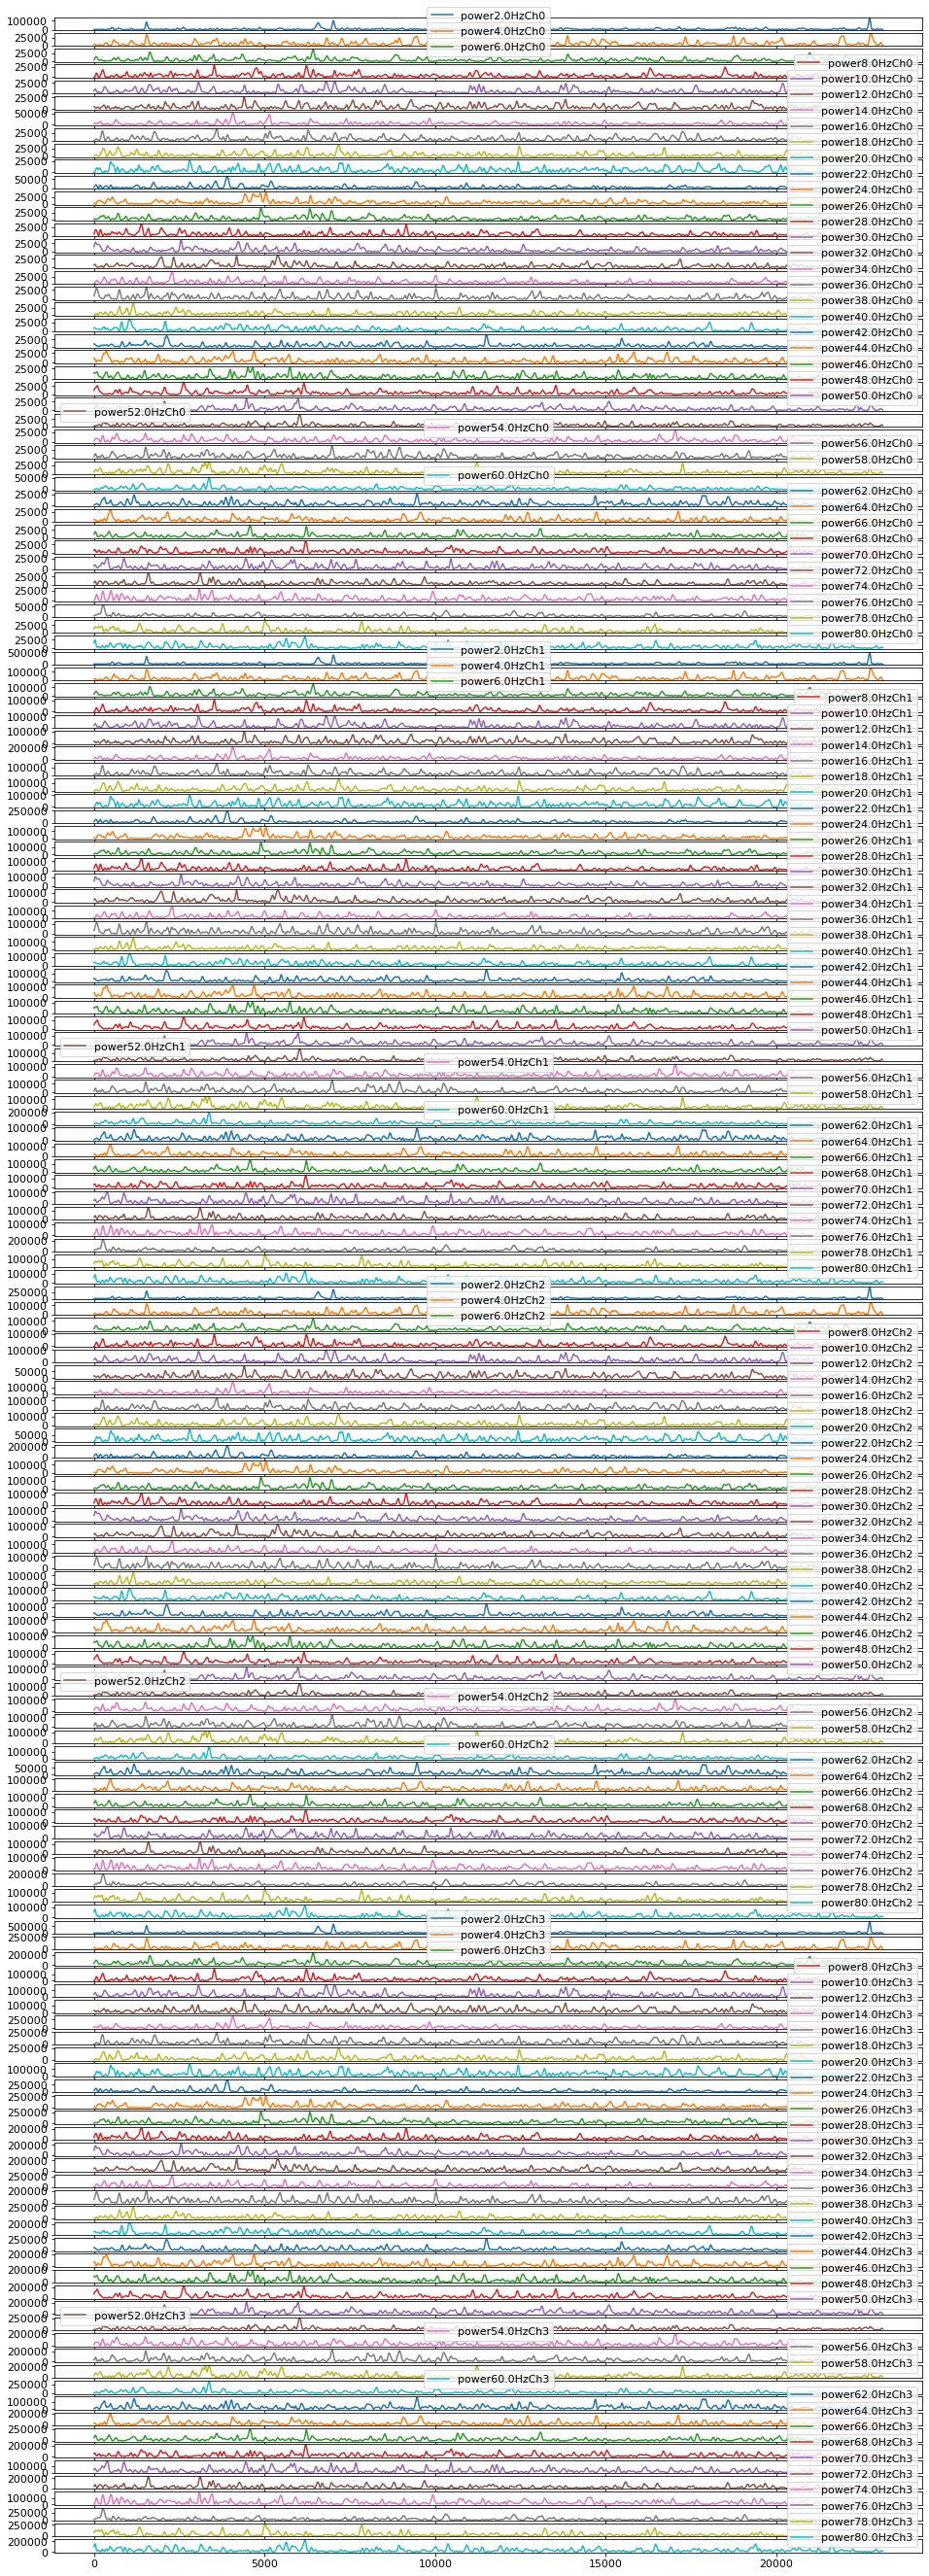

Plot power runtime = 27.9 seconds


In [53]:
# This visualization cell takes way too long to run.

time0 = time()

wavelet_output.plot(subplots=True, figsize=(16,48))
plt.show()

print('Plot power runtime = {} seconds'.format(np.round(time()-time0, 1)))

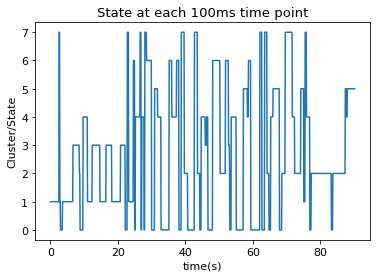

In [54]:
wavelet_output_dB = 10 * np.log10(wavelet_output)
# I downsampled at first, but downsampling seems to have no effect in this procedure.
wavelet_output_dB.index = pd.to_timedelta(np.linspace(0,len(wavelet_output_dB)/fs,len(wavelet_output_dB), endpoint=False), unit='s')
wavelet_output_dB_ds = wavelet_output_dB.resample('100ms').agg(['mean'])        #agg(agg_Hjorth_funcs)   #

#print(wavelet_output_dB_ds.head())
#print(wavelet_output_dB_ds.info())

tsne = TSNE(perplexity=5, init='pca')
transformed_dB = TSNE.fit_transform(tsne, X=StandardScaler().fit_transform(wavelet_output_dB_ds.values))

cluster_algo = AgglomerativeClustering(n_clusters=None, distance_threshold=300)     #MeanShift() # #
cluster_labels = cluster_algo.fit_predict(transformed_dB)
plt.plot(np.linspace(0, duration_of_input, len(cluster_labels), endpoint=False), cluster_labels)
plt.xlabel('time(s)')
plt.ylabel('Cluster/State')
plt.title('State at each 100ms time point')
plt.show()

avg_silhouette_score 0.29198882
(903,)


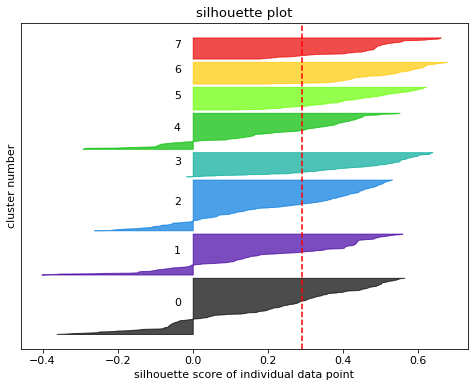

In [55]:
# Code adapted from scikit-learn website

# Silhouette score analysis (Looking for silhouette score > 0.25, preferably > 0.5)
   
x_cols = transformed_dB

avg_silhouette_score = silhouette_score(x_cols, cluster_labels)
individual_silhouette_scores = silhouette_samples(x_cols, cluster_labels)
print('avg_silhouette_score', avg_silhouette_score)
print(individual_silhouette_scores.shape)

y_lower = 10  # Give a cluster-specific baseline per subset

k = len(np.unique(cluster_labels))

fig, ax0 = plt.subplots(1, 1, figsize=[8,6])

for i in range(k):
    subset_sil_scores = individual_silhouette_scores[cluster_labels == i]
    subset_sil_scores.sort()

    size_of_subset = subset_sil_scores.shape[0]

    y_upper = y_lower + size_of_subset

    color = cm.nipy_spectral(float(i) / k)
    ax0.fill_betweenx(np.arange(y_lower, y_upper), 0, subset_sil_scores, facecolor=color, edgecolor=color, alpha=0.7)
    ax0.text(-0.05, y_lower + 0.5 * size_of_subset, str(i))

    y_lower = y_upper + 10   # Compute new y_lower for next cluster baseline

ax0.set_xlabel('silhouette score of individual data point')
ax0.set_ylabel('cluster number')
ax0.set_title('silhouette plot')

ax0.axvline(x=avg_silhouette_score, color="r", linestyle="--")
ax0.set_yticks([])  # Clear the yaxis labels / ticks
#ax0.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

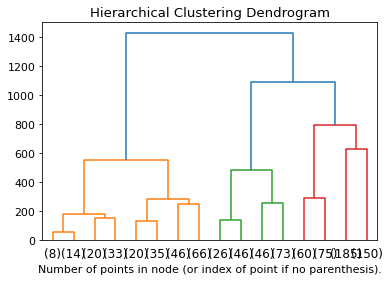

In [56]:
#from scikit-learn website: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(transformed_dB)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

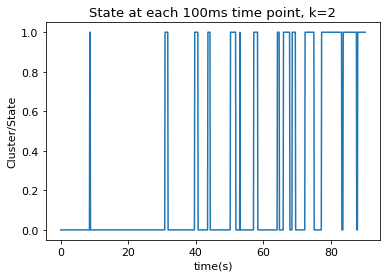

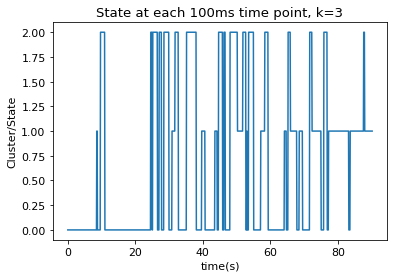

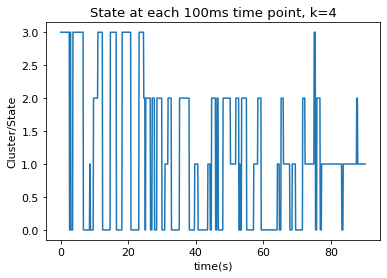

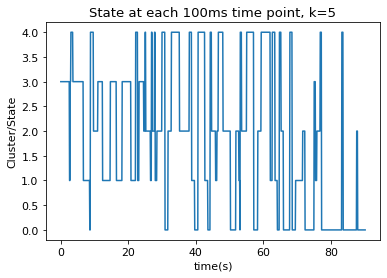

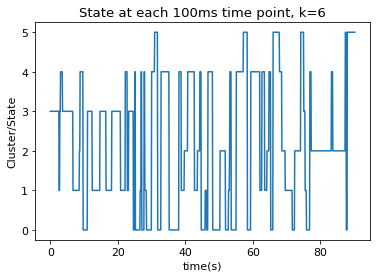

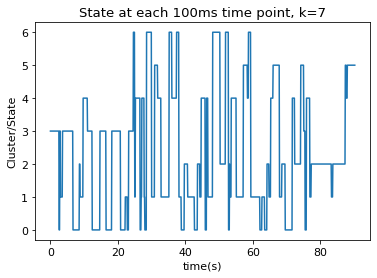

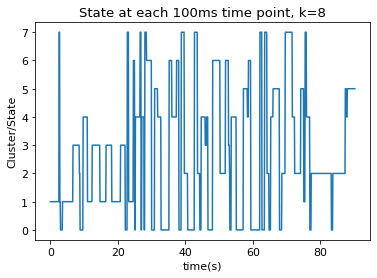

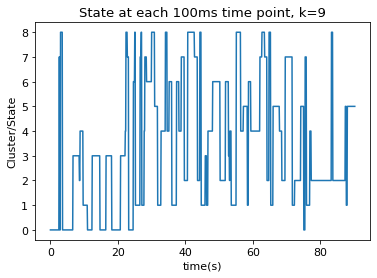

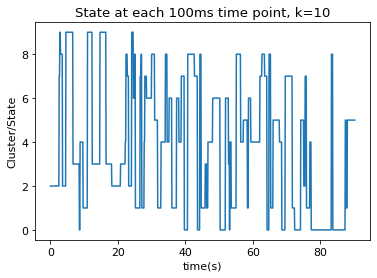

In [57]:
for k in range(2, 11):
    cluster_algo = AgglomerativeClustering(n_clusters=k)     #MeanShift() # #
    cluster_labels = cluster_algo.fit_predict(transformed_dB)
    plt.plot(np.linspace(0, duration_of_input, len(cluster_labels), endpoint=False), cluster_labels)
    plt.xlabel('time(s)')
    plt.ylabel('Cluster/State')
    plt.title('State at each 100ms time point, k={}'.format(k))
    plt.show()

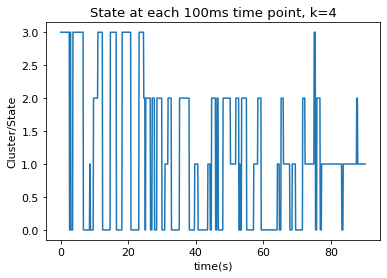

In [58]:
k=4
cluster_algo = AgglomerativeClustering(n_clusters=k)     #MeanShift() # #
cluster_labels = cluster_algo.fit_predict(transformed_dB)
plt.plot(np.linspace(0, duration_of_input, len(cluster_labels), endpoint=False), cluster_labels)
plt.xlabel('time(s)')
plt.ylabel('Cluster/State')
plt.title('State at each 100ms time point, k={}'.format(k))
plt.show()

In [59]:
times_states = [(np.round(t,1), state) for t, state in zip(np.linspace(0,duration_of_input,len(cluster_labels),endpoint=False), cluster_labels)]
#times_states
state_changes = [times_states[0]]
state_changes.extend([times_states[i] for i in range(1, len(times_states)) if times_states[i][1] - times_states[i-1][1] != 0])
print('(time, state_number):\n')
print(state_changes)

(time, state_number):

[(0.0, 3), (2.6, 0), (2.8, 3), (3.0, 0), (3.6, 3), (6.7, 0), (8.6, 1), (8.8, 0), (9.7, 2), (11.0, 3), (12.4, 0), (14.7, 3), (16.5, 0), (18.2, 3), (20.8, 0), (23.2, 3), (24.6, 2), (25.0, 0), (25.2, 2), (26.6, 0), (27.1, 2), (27.8, 0), (28.5, 2), (30.0, 0), (30.9, 1), (31.8, 2), (32.8, 0), (35.2, 2), (38.1, 0), (39.7, 1), (40.7, 0), (43.6, 1), (44.3, 0), (44.7, 2), (45.9, 0), (46.3, 2), (46.7, 0), (48.1, 2), (50.3, 1), (51.9, 2), (52.8, 0), (53.1, 1), (53.2, 0), (53.6, 2), (55.1, 0), (57.2, 1), (58.4, 2), (59.4, 0), (64.2, 1), (64.8, 0), (65.3, 2), (66.0, 1), (67.9, 0), (68.6, 1), (69.6, 0), (71.7, 2), (72.4, 1), (75.1, 3), (75.5, 0), (75.9, 2), (76.9, 0), (77.3, 1), (83.3, 0), (83.7, 1), (87.7, 2), (88.0, 1)]


# Repeat analysis 20 times and analyze state estimate stability

In [60]:
runs_complete = 0
supreme_list = []

while runs_complete < 20:
    # main cell for repeat

    # Blind source separation 
    # Failure to converge can be fixed by increasing max_iter and tol arguments, but results will be the same.
    ica = FastICA(n_components=num_columns)#, max_iter=2000, tol=5e-3)  # , random_state=0
    ica_sources = ica.fit_transform(df_full.values)
    print("Blind source separation complete")

    # Identify outliers and reject problematic noise sources
    print('Finding outliers with multidimensional EllipticEnvelope.')
    outlier_labels = EllipticEnvelope().fit_predict(ica_sources)  # find outliers
    inlier_mask = outlier_labels==1

    # Reject sources where the set of all outliers have at least 4 times more variance than the set of all inliers
    print('Rejecting dimensions where outliers have high variance. [var(outliers) > 4*var(inliers)]')
    reject_source_list = [i for i in range(num_columns) if np.var(ica_sources[:,i][~inlier_mask]) / np.var(ica_sources[:,i][inlier_mask]) > 4]
    print('{} sources rejected :'.format(len(reject_source_list)), reject_source_list)


    print('Remixing without rejected sources')

    # Remix channels without problematic sources
    keep_components = [i for i in range(num_columns) if i not in reject_source_list]
    remixed_full = np.dot(ica.mixing_[:,keep_components], ica_sources.T[keep_components,:]).T


    time0 = time()
    # 78 wavelets with peak frequency of 2Hz, 3Hz,..., 79Hz with n_cycles of 2, 3, ..., 79.
    wavelet_output = apply_wavelets(np.linspace(2,80,40), fs=fs, data=remixed_full, n_wavelet_cycles=np.linspace(2,80,40), extract_list=['power'], plot_things=False, verbose=False)      

    print('Power extract runtime = {} seconds'.format(np.round(time()-time0, 1)))


    wavelet_output_dB = 10 * np.log10(wavelet_output)
    #wavelet_output_dB.index = pd.to_timedelta(np.linspace(0,9595/300,9595, endpoint=False), unit='s')
    #wavelet_output_dB_ds = wavelet_output_dB.resample('100ms').agg(['mean']) #agg(agg_Hjorth_funcs)   #

    tsne = TSNE(perplexity=5, init='pca')
    transformed_dB = TSNE.fit_transform(tsne, X=StandardScaler().fit_transform(wavelet_output_dB_ds.values))

    print('Searching for highest k from 2 to 10 where all states last at least 1 second.')
    outer_list=[]
    for k in range(2, 11):
        cluster_algo = AgglomerativeClustering(n_clusters=k)     #MeanShift() # #
        cluster_labels = cluster_algo.fit_predict(transformed_dB)

        times_states = [(np.round(t,1), state) for t, state in zip(np.linspace(0,duration_of_input,len(cluster_labels),endpoint=False), cluster_labels)]
        #times_states
        state_changes = [times_states[0]]
        state_changes.extend([times_states[i] for i in range(1, len(times_states)) if times_states[i][1] - times_states[i-1][1] != 0])

        states_under_1_sec = 0
        for time_length in np.diff([time_point for time_point in [state_change[0] for state_change in state_changes]]):
            if time_length < 1:
                states_under_1_sec += 1

        if states_under_1_sec > 0:
            continue
        else:
            outer_list.append(k)

    try:
        print('stable k =',outer_list[-1])

        k=outer_list[-1]
        cluster_algo = AgglomerativeClustering(n_clusters=k)    
        cluster_labels = cluster_algo.fit_predict(transformed_dB)
        #plt.plot(np.linspace(0, duration_of_input, len(cluster_labels), endpoint=False), cluster_labels)
        #plt.xlabel('time(s)')
        #plt.ylabel('Cluster/State')
        #plt.title('State at each 100ms time point, k={}'.format(k))
        #plt.show()

        times_states = [(np.round(t,1), state) for t, state in zip(np.linspace(0,duration_of_input,len(cluster_labels),endpoint=False), cluster_labels)]
        #times_states
        state_changes = [times_states[0]]
        state_changes.extend([times_states[i] for i in range(1, len(times_states)) if times_states[i][1] - times_states[i-1][1] != 0])
        print('(time, state_number):\n')
        print(state_changes)

        runs_complete += 1
        supreme_list.append(state_changes)
    except:
        print('NO STABLE SOLUTION! (Each state must last at least 1 second.)')
        
print(supreme_list)

Blind source separation complete
Finding outliers with multidimensional EllipticEnvelope.
Rejecting dimensions where outliers have high variance. [var(outliers) > 4*var(inliers)]
3 sources rejected : [1, 2, 3]
Remixing without rejected sources
Power extract runtime = 0.8 seconds
Searching for highest k from 2 to 10 where all states last at least 1 second.
NO STABLE SOLUTION! (Each state must last at least 1 second.)
Blind source separation complete
Finding outliers with multidimensional EllipticEnvelope.
Rejecting dimensions where outliers have high variance. [var(outliers) > 4*var(inliers)]
3 sources rejected : [1, 2, 3]
Remixing without rejected sources
Power extract runtime = 0.9 seconds
Searching for highest k from 2 to 10 where all states last at least 1 second.
NO STABLE SOLUTION! (Each state must last at least 1 second.)
Blind source separation complete
Finding outliers with multidimensional EllipticEnvelope.
Rejecting dimensions where outliers have high variance. [var(outliers)

KeyboardInterrupt: 

In [38]:
duration/'1s'

90.292438

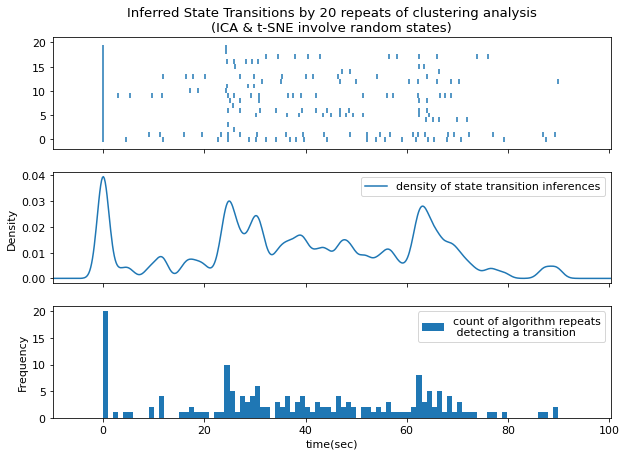

In [39]:
outer_time_list = []

for row in supreme_list:
    outer_time_list.append([item[0] for item in row])

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,7), sharex=True)
    
ax1.eventplot(outer_time_list)
ax1.set_xlabel('time(sec)')
ax1.set_ylabel('')
ax1.set_title('Inferred State Transitions by 20 repeats of clustering analysis\n(ICA & t-SNE involve random states)')


temp = []
for row in outer_time_list:
    temp.extend([item for item in row])
temp

pd.DataFrame(temp).plot(kind='density', bw_method=0.05, ax=ax2)
ax2.legend(['density of state transition inferences'], loc='upper right')
ax2.set_xlabel('time(sec)')


pd.DataFrame(temp).plot(kind='hist', bins=int(duration/'1s'), ax=ax3)
ax3.set_xlabel('time(sec)')
ax3.legend(['count of algorithm repeats\n detecting a transition'], loc='upper right')

ax3.set_xlim(0-10, duration/'1s' + 10)
plt.show()

<AxesSubplot:ylabel='Frequency'>

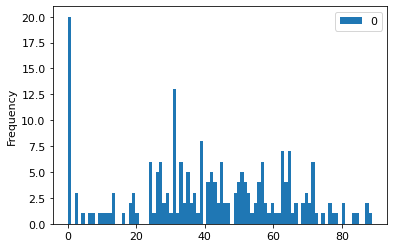

In [32]:
pd.DataFrame(temp).plot(kind='hist', bins=int(np.floor(duration_of_input)))

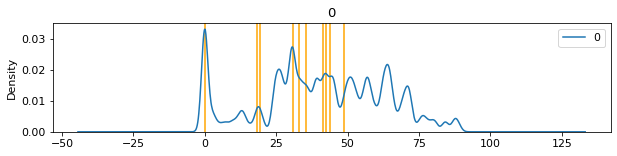

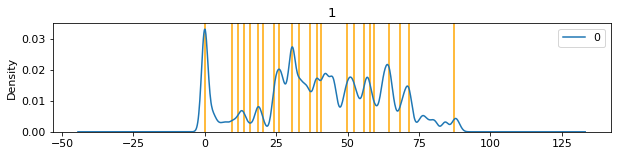

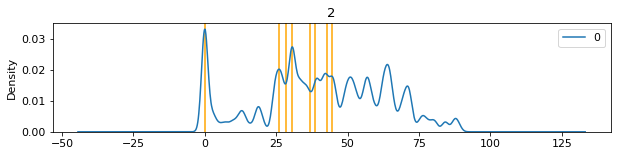

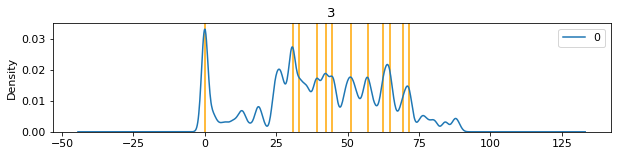

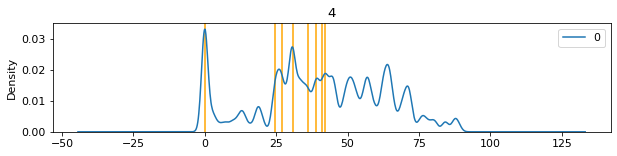

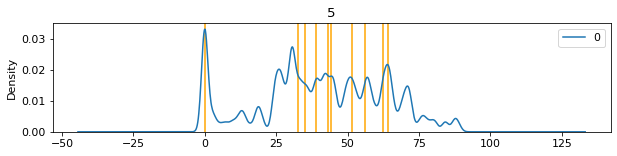

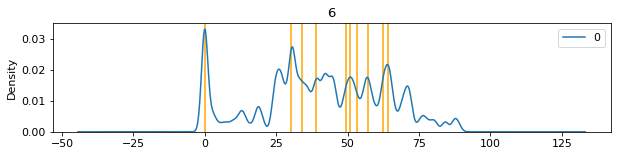

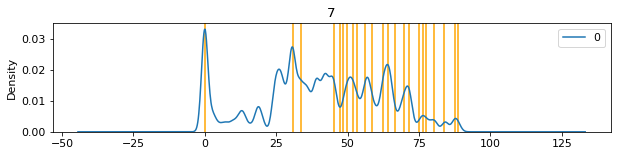

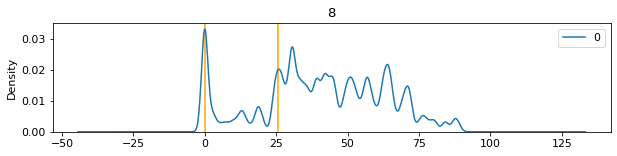

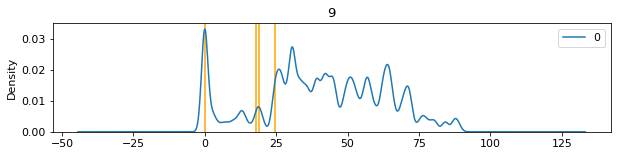

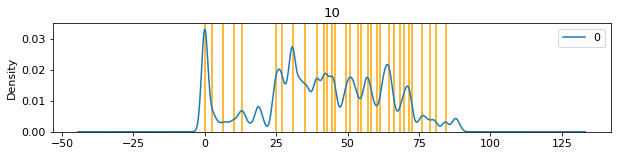

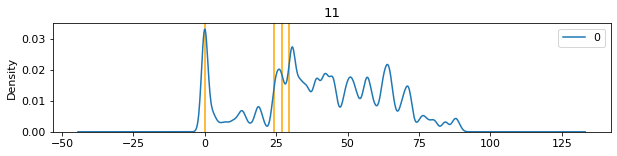

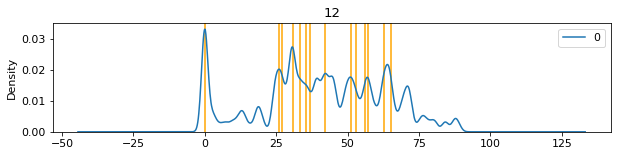

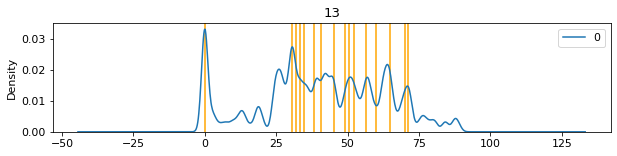

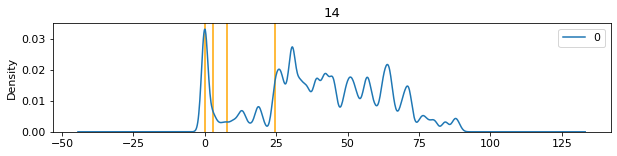

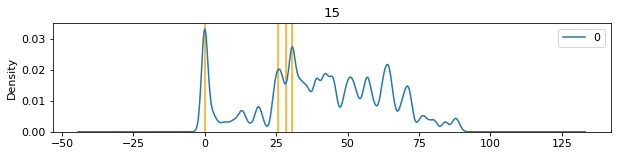

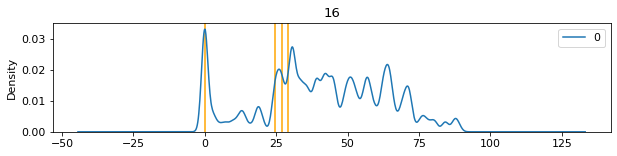

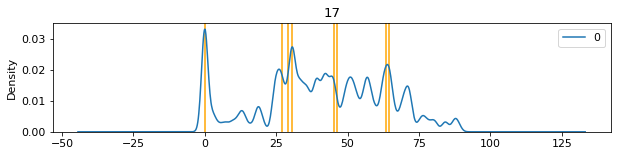

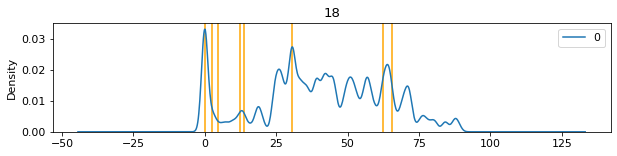

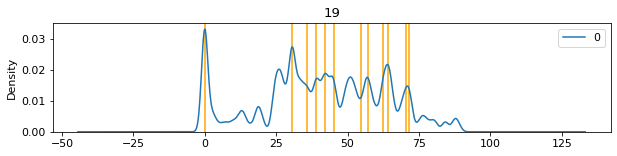

In [35]:
for i in range(len(outer_time_list)):
    fig, ax = plt.subplots(1,1,figsize=[10,2])
    ax.eventplot(outer_time_list[i], lineoffset=0, linelength=0.5, color='orange')
    pd.DataFrame(temp).plot(kind='density', bw_method=0.05, ax=ax)
    plt.ylim(0, 0.035)
    plt.title(i)
    plt.show()